In [22]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-12-21 07:25:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.145.128, 2a00:1450:4013:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M  29.4MB/s    in 2.2s    

2022-12-21 07:25:22 (29.4 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [23]:
import zipfile

local_zip = "/content/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [24]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train dirctory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train dirctory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [25]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [26]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.65.jpg', 'cat.870.jpg', 'cat.630.jpg', 'cat.44.jpg', 'cat.563.jpg', 'cat.948.jpg', 'cat.184.jpg', 'cat.302.jpg', 'cat.442.jpg', 'cat.933.jpg']
['dog.108.jpg', 'dog.984.jpg', 'dog.978.jpg', 'dog.372.jpg', 'dog.298.jpg', 'dog.9.jpg', 'dog.563.jpg', 'dog.217.jpg', 'dog.547.jpg', 'dog.63.jpg']


In [27]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

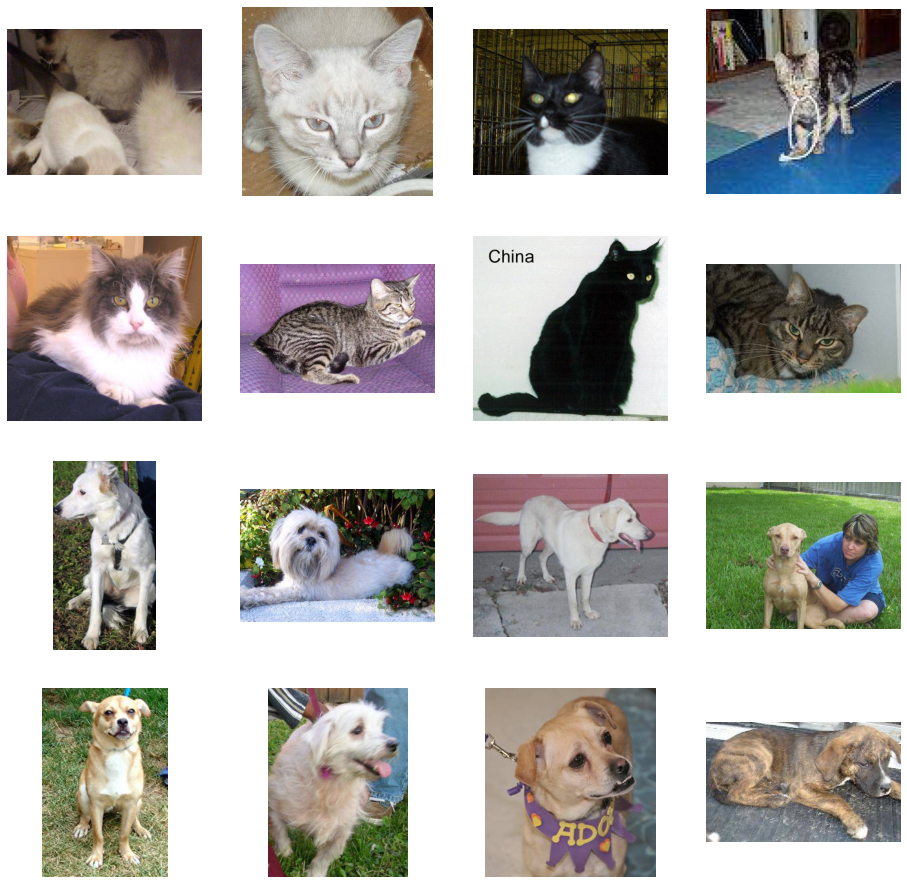

In [29]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [30]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [32]:
from tensorflow.python import metrics
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [33]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/15
100/100 - 10s - loss: 0.7231 - accuracy: 0.5745 - val_loss: 0.7364 - val_accuracy: 0.5450 - 10s/epoch - 100ms/step
Epoch 2/15
100/100 - 9s - loss: 0.5918 - accuracy: 0.6915 - val_loss: 0.5470 - val_accuracy: 0.7310 - 9s/epoch - 88ms/step
Epoch 3/15
100/100 - 9s - loss: 0.5051 - accuracy: 0.7595 - val_loss: 0.5702 - val_accuracy: 0.7200 - 9s/epoch - 89ms/step
Epoch 4/15
100/100 - 9s - loss: 0.4287 - accuracy: 0.8085 - val_loss: 0.7071 - val_accuracy: 0.7010 - 9s/epoch - 94ms/step
Epoch 5/15
100/100 - 10s - loss: 0.3444 - accuracy: 0.8480 - val_loss: 0.6041 - val_accuracy: 0.7080 - 10s/epoch - 103ms/step
Epoch 6/15
100/100 - 9s - loss: 0.2545 - accuracy: 0.8970 - val_loss: 0.7367 - val_accuracy: 0.6960 - 9s/epoch - 88ms/step
Epoch 7/15
100/100 - 10s - loss: 0.1793 - accuracy: 0.9265 - val_loss: 0.8024 - val_accuracy: 0.7360 - 10s/epoch - 98ms/step
Epoch 8/15
100/100 - 9s - loss: 0.1233 - accuracy: 0.9475 - val_loss: 1.0131 - val_accuracy: 0.7120 - 9s/epoch - 87ms/step
Epoch 9/

In [37]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img=load_img(path, target_size=(150,150))

  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0] > 0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving KOA_Nassau_2697x1517.jpg to KOA_Nassau_2697x1517 (2).jpg
1/1 [==============================] - 0s 18ms/step
[0.99999976]
KOA_Nassau_2697x1517.jpg is a dog


1/1 [==============================] - 0s 81ms/step


<ipython-input-40-b77bbba3ec87>:30: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


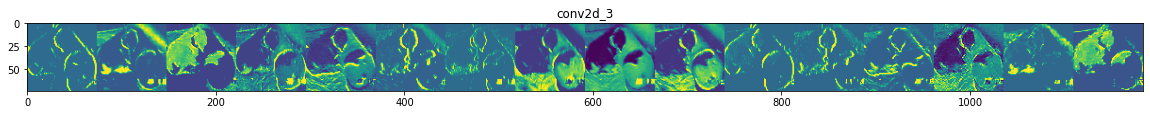

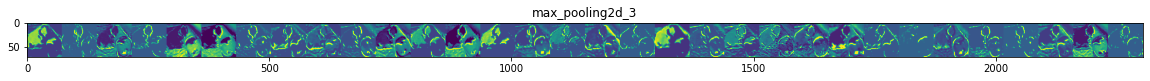

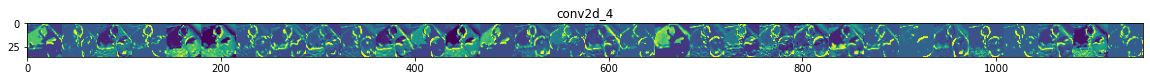

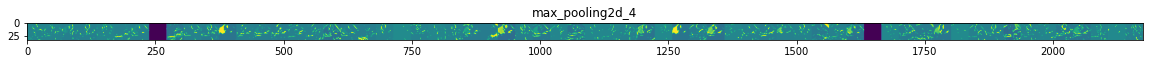

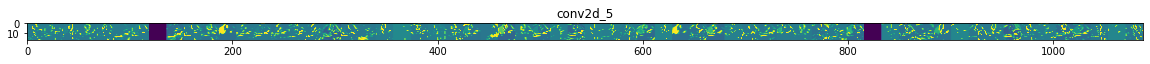

In [40]:
import numpy as np
import random
from tensorflow.keras.utils import load_img, img_to_array

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150,150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255.0

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and Validation loss')

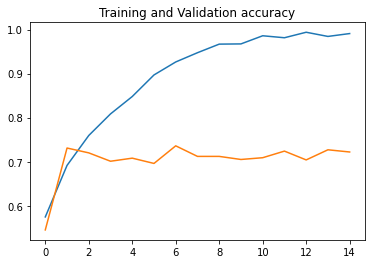

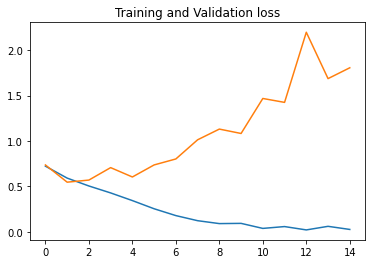

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation loss')